## **Experiment 1**

<b> Description: Evaluating Overall Accuracy of in detecting diverted sessions </b>

<ul>
  <li>Get the session that the system detects as diverted</li>
<li>Get user feedback on these sessions</li>
<li>Find the % of accuracy in detecting diversion</li>
  </ul>

Overall Accuracy =  ( Correctly evaluated sessions ) * 100 /  ( Total Sessions )

<h4> Experiment Details </h4>
<h4>No of session taken = 203</h4>
<h4>No of users =  43</h4>
<h4>Age group =  16 to 41</h4>
<h4>Profession = Students,Software Engineeers</h4>

In [43]:
from pymongo import MongoClient
import matplotlib.pyplot as plt

# connect to MongoDB, change the << MONGODB URL >> to reflect your own connection string
client = MongoClient()
db=client.washi
#DB
session_details_collection = db.session_details

<h3> 1.1 Understanding the need for a tool to detect diversion (Based on feedback from the users)</h3>

/root/Results_Notebooks/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  after removing the cwd from sys.path.
/root/Results_Notebooks/venv/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """
/root/Results_Notebooks/venv/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


<module 'matplotlib.pyplot' from '/root/Results_Notebooks/venv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

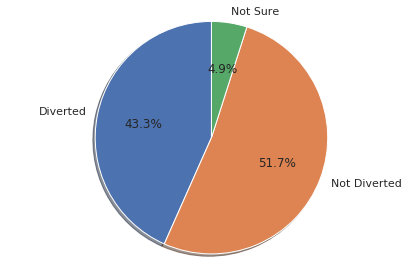

In [59]:
# Pie chart
labels = ['Diverted', 'Not Diverted','Not Sure']

diverted_count = db.session_details.find({'user_feedback':'diverted'}).count()
not_diverted_count = db.session_details.find({'user_feedback':'focused'}).count()
not_sure_count = db.session_details.find({'user_feedback':'notsure'}).count()

session_details_collection.find()
sizes = [diverted_count,not_diverted_count,not_sure_count]
# only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt

<h3> 1.2 Estimating the overall accuracy </h3>

Text(0.5, 1.0, 'Overall prediction accuracy')

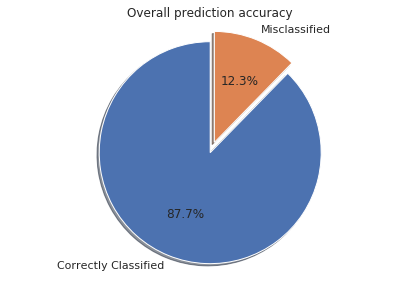

In [69]:
count = 0
correct = 0
for i in session_details_collection.find():
    if (i['user_feedback'] == i['system_feedback']):
        correct += 1
    count += 1

# PLOTTING 
# Pie chart
labels = ['Correctly Classified', 'Misclassified']
sizes = [correct, count-correct]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Overall prediction accuracy")

<h3> 1.3 Accuracy across different categories </h3>

Text(0.5, 1.0, 'Prediction accuracy across diverted sessions')

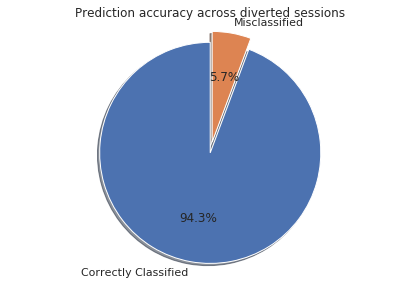

In [72]:
diverted_count = 0
diverted_correct = 0
not_diverted_count = 0
not_diverted_correct = 0

for i in session_details_collection.find():
    if (i['user_feedback'] == 'diverted'):
        diverted_count+=1
        if(i['system_feedback'] == 'diverted'):
            diverted_correct+=1
            
    if (i['user_feedback'] == 'focused'):
        not_diverted_count+=1
        if(i['system_feedback'] == 'focused'):
            not_diverted_correct+=1
    

# PLOTTING 
# Pie chart
labels = ['Correctly Classified', 'Misclassified']
diverted_sizes = [diverted_correct, diverted_count-diverted_correct]
non_diverted_sizes = [not_diverted_correct, not_diverted_count-not_diverted_correct]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1,0)
fig1, ax1 = plt.subplots()

ax1.pie(diverted_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Prediction accuracy across diverted sessions")

Text(0.5, 1.0, 'Prediction accuracy across focused sessions')

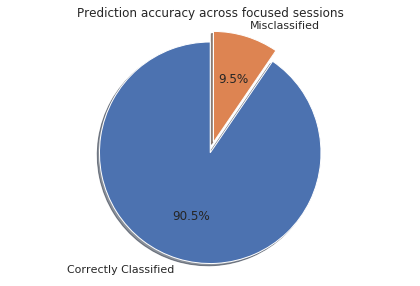

In [73]:
fig2, ax2 = plt.subplots()
ax2.pie(non_diverted_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.title("Prediction accuracy across focused sessions")

<h3>1.4 Percentage of diverted session across the users</h3>